In [1]:
from get_data import download_data
import pandas as pd
import talib
from backtesting.lib import crossover
from backtesting import Backtest, Strategy
from my_strategies import *
# let's live on the edge and ignore nuisance warnings
import warnings
warnings.filterwarnings('ignore')

/home/sanjay/backtesting/lib/python3.12/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

## Let's get some data!  
We will run this once to initially download the data into csv files and the read into df's as needed

In [ ]:
 tickers = ['QQQ', 'SPY', 'BTC-USD', 'ETH-USD', 'GC=F']
start='1920-01-01'
end='2024-08-03'
download_data(tickers,start,end)

In [2]:
df=pd.read_csv(r'BTC-USD.csv', index_col='Date',parse_dates=True)
df=df.dropna()

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
# create a dict to accumulate our results
sharpe_dict={}
return_dict={}

### Test out the MACD strategy

In [5]:
bt =Backtest(df, MACDStrategy, cash=100_000)

In [6]:
stats = bt.run()

In [7]:
stats

Start                     2014-09-17 00:00:00
End                       2024-08-02 00:00:00
Duration                   3607 days 00:00:00
Exposure Time [%]                   24.833703
Equity Final [$]              10179986.159698
Equity Peak [$]               11062671.480011
Return [%]                        10079.98616
Buy & Hold Return [%]            13328.930367
Return (Ann.) [%]                   59.629038
Volatility (Ann.) [%]               56.815314
Sharpe Ratio                         1.049524
Sortino Ratio                        2.957696
Calmar Ratio                         1.586408
Max. Drawdown [%]                  -37.587445
Avg. Drawdown [%]                   -6.687044
Max. Drawdown Duration     1116 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                                   60
Win Rate [%]                             50.0
Best Trade [%]                     116.213413
Worst Trade [%]                     -16.76699
Avg. Trade [%]                    

In [8]:
sharpe_dict["MACD"]=stats["Sharpe Ratio"]
return_dict["MACD"]=stats["Return (Ann.) [%]"]

In [9]:
bt.plot(filename='MACD_plot.html')

GridPlot(id='p1370', ...)

## test out RSI with low volatility

In [10]:
bt =Backtest(df, ATRRSIStrategy, cash=100_000)

In [11]:
stats = bt.run()

In [12]:
stats

Start                     2014-09-17 00:00:00
End                       2024-08-02 00:00:00
Duration                   3607 days 00:00:00
Exposure Time [%]                   19.872506
Equity Final [$]                108356.150757
Equity Peak [$]                 127150.682007
Return [%]                           8.356151
Buy & Hold Return [%]            13328.930367
Return (Ann.) [%]                     0.81518
Volatility (Ann.) [%]                26.42196
Sharpe Ratio                         0.030852
Sortino Ratio                          0.0441
Calmar Ratio                         0.020468
Max. Drawdown [%]                  -39.826216
Avg. Drawdown [%]                  -13.968843
Max. Drawdown Duration     1238 days 00:00:00
Avg. Drawdown Duration      291 days 00:00:00
# Trades                                   16
Win Rate [%]                             62.5
Best Trade [%]                      40.748037
Worst Trade [%]                     -37.08002
Avg. Trade [%]                    

In [13]:
bt.plot(filename='RSI_plot.html')

GridPlot(id='p1816', ...)

In [14]:
stats['_strategy']

<Strategy ATRRSIStrategy>

In [15]:
stats['_trades'].head()

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,355,109,120,281.145996,176.897003,-37008.392487,-0.370800,2015-01-04,2015-01-15,11 days
1,287,210,273,219.072998,250.822998,9112.250000,0.144929,2015-04-15,2015-06-17,63 days
2,319,336,337,225.671005,226.899002,391.730988,0.005442,2015-08-19,2015-08-20,1 days
3,10,1291,1316,6892.479980,9701.030273,28085.502930,0.407480,2018-03-31,2018-04-25,25 days
4,14,1350,1406,7129.459961,7716.509766,8218.697266,0.082341,2018-05-29,2018-07-24,56 days


In [16]:
stats['_trades'].Duration.max()

Timedelta('212 days 00:00:00')

In [17]:
sharpe_dict["RSI"]=stats["Sharpe Ratio"]
return_dict["RSI"]=stats["Return (Ann.) [%]"]

## Test Support and Resistance With HODL Wave Peaks on Bitcoin

In [18]:
df_hodl=pd.read_csv(r'HODL.txt', index_col='Date',parse_dates=True)
df=df.merge(df_hodl, how="left",left_index=True,right_index=True)
df.Peak=df.Peak.fillna(0)

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Peak
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0.0


In [20]:
bt =Backtest(df, SupportAndResWithPeakHodl, cash=100_000)

In [21]:
stats = bt.run()

In [22]:
stats

Start                     2014-09-17 00:00:00
End                       2024-08-02 00:00:00
Duration                   3607 days 00:00:00
Exposure Time [%]                   25.304878
Equity Final [$]               2635626.967133
Equity Peak [$]                3689566.885101
Return [%]                        2535.626967
Buy & Hold Return [%]            13328.930367
Return (Ann.) [%]                   39.233076
Volatility (Ann.) [%]               52.417305
Sharpe Ratio                         0.748476
Sortino Ratio                        1.718491
Calmar Ratio                         0.640945
Max. Drawdown [%]                  -61.211273
Avg. Drawdown [%]                  -11.074682
Max. Drawdown Duration     1258 days 00:00:00
Avg. Drawdown Duration       84 days 00:00:00
# Trades                                   29
Win Rate [%]                        51.724138
Best Trade [%]                     288.302581
Worst Trade [%]                    -18.550455
Avg. Trade [%]                    

In [23]:
sharpe_dict["HODL_PK"]=stats["Sharpe Ratio"]
return_dict["HODL_PK"]=stats["Return (Ann.) [%]"]

In [24]:
bt.plot(filename='BTC_peak_hodl.html')

GridPlot(id='p2208', ...)

## Optimize Support and Resistance Periods

In [25]:
bt =Backtest(df, SupportAndResWithPeakHodl, cash=100_000)

In [26]:
stats = bt.optimize(
    LT=range(50,200,10),
    ST=range(2,40,2),
    maximize = 'Sharpe Ratio'

)

In [27]:
stats

Start                     2014-09-17 00:00:00
End                       2024-08-02 00:00:00
Duration                   3607 days 00:00:00
Exposure Time [%]                   13.386918
Equity Final [$]               2419012.751923
Equity Peak [$]                2419148.876923
Return [%]                        2319.012752
Buy & Hold Return [%]            13328.930367
Return (Ann.) [%]                   38.030316
Volatility (Ann.) [%]               39.345085
Sharpe Ratio                         0.966584
Sortino Ratio                        2.460077
Calmar Ratio                         1.030172
Max. Drawdown [%]                  -36.916472
Avg. Drawdown [%]                   -8.008515
Max. Drawdown Duration     1114 days 00:00:00
Avg. Drawdown Duration       99 days 00:00:00
# Trades                                   38
Win Rate [%]                        57.894737
Best Trade [%]                      71.331951
Worst Trade [%]                    -11.542403
Avg. Trade [%]                    

In [28]:
stats['_strategy']

<Strategy SupportAndResWithPeakHodl(LT=150,ST=2)>

## Re run with optimized parameters

In [29]:
bt =Backtest(df, SupportAndResWithPeakHodl_opt, cash=100_000)

In [30]:
stats = bt.run()

In [31]:
stats

Start                     2014-09-17 00:00:00
End                       2024-08-02 00:00:00
Duration                   3607 days 00:00:00
Exposure Time [%]                   13.386918
Equity Final [$]               2419012.751923
Equity Peak [$]                2419148.876923
Return [%]                        2319.012752
Buy & Hold Return [%]            13328.930367
Return (Ann.) [%]                   38.030316
Volatility (Ann.) [%]               39.345085
Sharpe Ratio                         0.966584
Sortino Ratio                        2.460077
Calmar Ratio                         1.030172
Max. Drawdown [%]                  -36.916472
Avg. Drawdown [%]                   -8.008515
Max. Drawdown Duration     1114 days 00:00:00
Avg. Drawdown Duration       99 days 00:00:00
# Trades                                   38
Win Rate [%]                        57.894737
Best Trade [%]                      71.331951
Worst Trade [%]                    -11.542403
Avg. Trade [%]                    

In [32]:
sharpe_dict["HODL_PK_O"]=stats["Sharpe Ratio"]
return_dict["HODL_PK_O"]=stats["Return (Ann.) [%]"]

In [33]:
bt.plot(filename='BTC_peak_hodl_o.html')

GridPlot(id='p2601', ...)

## Test Support & Resistance Without HODL Wave Peaks for Reference

In [34]:
df=pd.read_csv(r'BTC-USD.csv', index_col='Date',parse_dates=True)
df=df.dropna()

In [35]:
bt =Backtest(df, SupportAndRes, cash=100_000)

In [36]:
stats = bt.run()

In [37]:
sharpe_dict["S&R"]=stats["Sharpe Ratio"]
return_dict["S&R"]=stats["Return (Ann.) [%]"]

In [38]:
print(stats)

Start                     2014-09-17 00:00:00
End                       2024-08-02 00:00:00
Duration                   3607 days 00:00:00
Exposure Time [%]                   26.080931
Equity Final [$]                3389418.46225
Equity Peak [$]                4844970.552094
Return [%]                        3289.418462
Buy & Hold Return [%]            13328.930367
Return (Ann.) [%]                   42.821538
Volatility (Ann.) [%]               54.961179
Sharpe Ratio                         0.779123
Sortino Ratio                        1.843095
Calmar Ratio                         0.778626
Max. Drawdown [%]                  -54.996282
Avg. Drawdown [%]                  -10.678539
Max. Drawdown Duration     1238 days 00:00:00
Avg. Drawdown Duration       78 days 00:00:00
# Trades                                   26
Win Rate [%]                        53.846154
Best Trade [%]                     311.875069
Worst Trade [%]                    -18.550455
Avg. Trade [%]                    

In [39]:
sharpe_dict=dict(sorted(sharpe_dict.items(), key=lambda item: item[1]))

In [40]:
return_dict=dict(sorted(return_dict.items(), key=lambda item: item[1]))

In [41]:
sharpe_dict

{'RSI': 0.030852361363153506,
 'HODL_PK': 0.7484756401035287,
 'S&R': 0.7791233637361313,
 'HODL_PK_O': 0.9665836515701369,
 'MACD': 1.0495240405412147}

In [42]:
return_dict

{'RSI': 0.8151798481836892,
 'HODL_PK_O': 38.03031561846315,
 'HODL_PK': 39.23307558426108,
 'S&R': 42.82153845732426,
 'MACD': 59.62903813106246}

In [43]:
import plotly.express as px

In [55]:
df_sharpe = pd.DataFrame(list(sharpe_dict.items()), columns=['Strategy', 'Sharpe Ratio'])
df_returns = pd.DataFrame(list(return_dict.items()), columns=['Strategy', 'Annual Returns pct'])

In [57]:
sharpe_fig = px.bar(df_sharpe, x='Strategy', y='Sharpe Ratio', title='Sharpe Ratios by Strategy')
returns_fig = px.bar(df_returns, x='Strategy', y='Annual Returns pct', title='Annual Returns Ratios by Strategy')

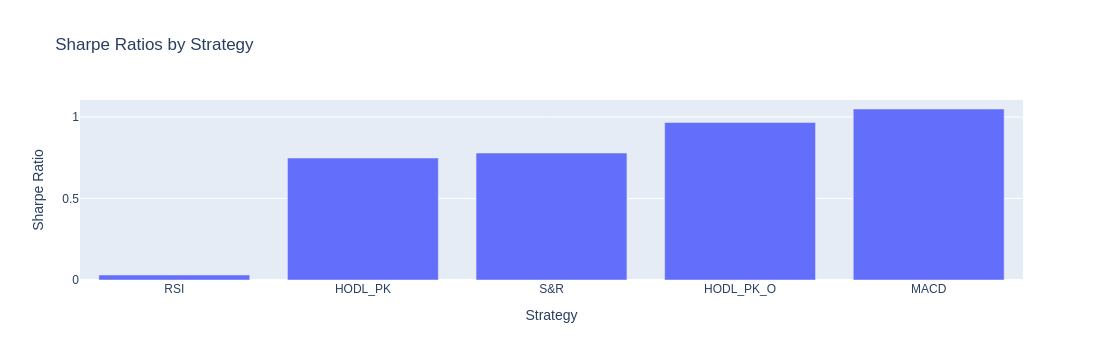

In [58]:
sharpe_fig.show()

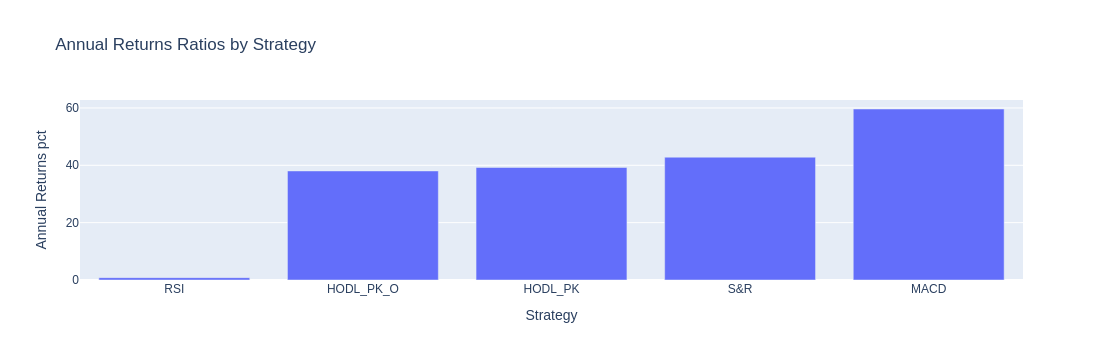

In [59]:
returns_fig.show()

In [60]:
sharpe_fig.write_html('sharpe_plot.html')
returns_fig.write_html('returns_plot.html')

In [61]:
# Have fun!